In [ ]:
from weatherbenchAfrica.data_loaders.imerg_loader import IMERGLoader

#https://disc.gsfc.nasa.gov/datasets/GPM_3IMERGDF_07/summary 
#GPM IMERG Final Precipitation L3 1 day 0.1 degree x 0.1 degree V07 (GPM_3IMERGDF)

#https://storage.googleapis.com/weather-bench-africa/IMERG/Kenya/3B-DAY.MS.MRG.3IMERG.20180101-S000000-E235959.V07B_KENYA.nc4

loader = IMERGLoader(data_dir="weatherbenchAfrica/data_sample/imerg_kenya", compute=True, add_nan_mask=True)
times = ["2018-01-01T00:00", "2020-05-01T00:00"]

chunk = loader.load_chunk(init_times=times)


In [38]:
precip_ds=chunk["precipitation"]

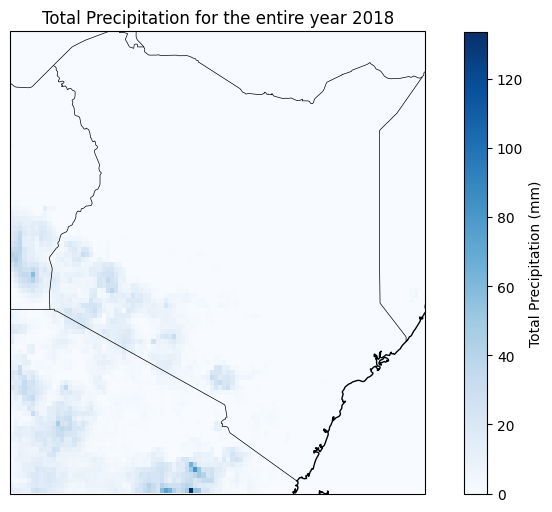

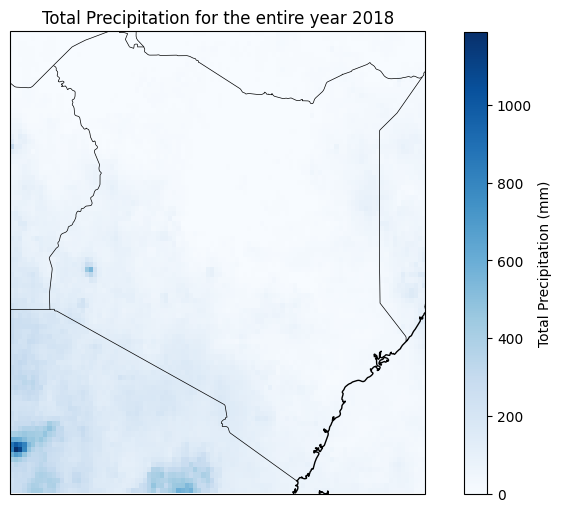

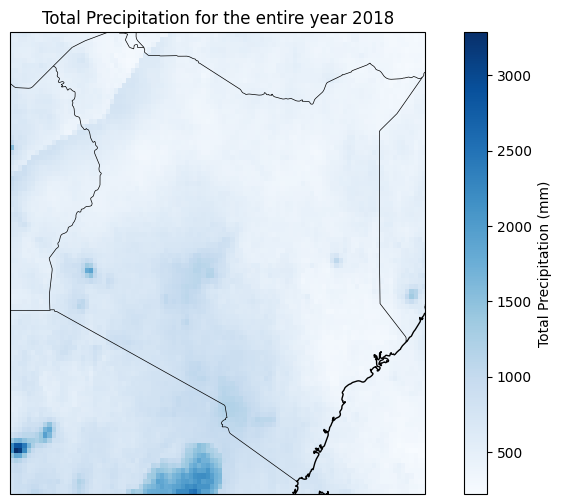

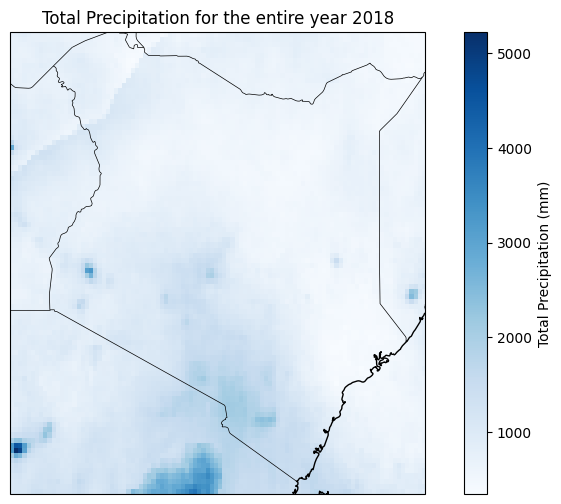

In [46]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.colors import LogNorm
import numpy as np
# Select data for 2018

for end_date in ["2018-01-01","2018-03-01","2018-06-01","2018-12-31"]:
    ds_2018 = precip_ds.sel(time=slice("2018-01-01", end_date))

    # Sum precipitation over time (resulting shape: lat x lon)
    total_precip = ds_2018.sum(dim='time')

    # Get coordinates
    lons = ds.lon.values
    lats = ds.lat.values

    # Get extent for imshow (left, right, bottom, top)
    extent = [lons.min(), lons.max(), lats.min(), lats.max()]

    # Plot
    fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.PlateCarree()})
    img = ax.imshow(
        total_precip.values,
        extent=extent,
        origin='lower',
        cmap='Blues',
        
        interpolation='none',
    )

    # Add coastlines and borders
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS, linewidth=0.5)
    ax.set_title("Total Precipitation for the entire year 2018")
    plt.colorbar(img, ax=ax, label='Total Precipitation (mm)')
    plt.show()
    plt.close(fig)


In [51]:
precip_ds

<xarray.DataArray 'precipitation' (time: 851, lon: 90, lat: 100)> Size: 31MB
array([[[1.3579997e+01, 1.2344999e+01, 1.1550000e+01, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [7.7799988e+00, 5.7350001e+00, 8.2900000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [2.8050001e+00, 2.0199997e+00, 3.2050002e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        ...,
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00]],

       [[0.0000000e+00, 3.5000000e-02, 1.4999999e-01, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 6.4999998e-02, 1.1000000e-01, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 2.9999999e-02, 8.9999996e-02, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
...
         2.3574999e+01, 1.8854996e+01, 2.0805000e+01],
        [4.8534996e+01, 5.5609993e+01, 5.6504990e+01, ...,
         1.2350002e+01, 1.2365000e+01, 1.2830002e+01],
        [3.9710011e+01, 4.4574997e+01, 4.9939995e+01, ...,
         9.8599997e+00, 2.1964996e+01, 8.4900007e+00]],

       [[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         1.3999999e-01, 8.0999994e-01, 1.3249999e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 9.9999998e-03],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 1.7999999e-01],
        ...,
        [1.7000000e-01, 9.3500000e-01, 8.4499991e-01, ...,
         1.0500000e+01, 8.6549997e+00, 4.2049999e+00],
        [2.4999999e-02, 7.4500006e-01, 8.0500007e-01, ...,
         9.7400007e+00, 8.2950001e+00, 1.9699999e+00],
        [2.4000001e-01, 4.1499996e-01, 8.6500007e-01, ...,
         2.4055000e+01, 1.9934999e+01, 1.7924999e+01]]],
      shape=(851, 90, 100), dtype=float32)
Coordinates:
  * lon      (lon) float32 360B 33.05 33.15 33.25 33.35 ... 41.75 41.85 41.95
  * lat      (lat) float64 800B -4.95 -4.85 -4.75 -4.65 ... 4.65 4.75 4.85 4.95
  * time     (time) datetime64[ns] 7kB 2018-01-01 2018-01-02 ... 2020-05-01
    mask     (time, lon, lat) bool 8MB True True True True ... True True True
Attributes:
    units:      mm/day
    long_name:  Daily mean precipitation rate (combined microwave-IR) estimat...

In [48]:
import xarray as xr

# Load IMERG data
imerg = precip_ds

# Confirm grid resolution (should be 0.1°)
lat_res = float(imerg.lat[1] - imerg.lat[0])
lon_res = float(imerg.lon[1] - imerg.lon[0])
print(f"Lat/Lon resolution: {lat_res}, {lon_res}")

# Determine coarsening factor for 0.25° (round to nearest integer)
lat_factor = round(0.25 / lat_res)
lon_factor = round(0.25 / lon_res)
print(f"Coarsening factor: {lat_factor} x {lon_factor}")

# Coarsen (average over blocks)
precip_coarse = precip_ds.coarsen(
    lat=lat_factor,
    lon=lon_factor,
    boundary='trim'  # trims edges that don't fit perfectly
).mean()

# Resulting resolution (roughly 0.25°)
print(precip_coarse.shape)
precip_coarse.name = "precipitation_upscaled"


Lat/Lon resolution: 0.10000000000000853, 0.10000228881835938
Coarsening factor: 2 x 2
(851, 45, 50)
